<br>
<font color=blue  size=6 face="微軟正黑體">[NCTS] 期末專案報告</font> 
<br>
<br>
<font color="#000080"  size=4 face="微軟正黑體">【成員】<br>胡嘉展(Joser Hu) : Data Collection、Design Flow、Coding、Compile、Test、Come out Report<br>紀弘俊(David Chi) : Coding、Try and Error、Compile、Final Tuning、Test、Trial run、Come out Report<br></font>
<br>
<br>
<font color="#000080"  size=4 face="微軟正黑體">Hardware Environment : Surface Book 2 (included NVIDIA® GeForce® GTX 1060 GPU)</font> 
<br>
<br>
<font color="#000080"  size=8 face="微軟正黑體">【題目】<br><br>應用深度學習來識別蔬果</font> 

<br>
<font color="#000080"  size=5 face="微軟正黑體"> 介紹 :</font>  
<br>
<font color="#000080" size=3 face="微軟正黑體"> 
使用卷積神經網路CNN識別蔬果圖像，內容包括 : 蘋果、梨、香蕉、仙人掌果、哈密瓜、櫻桃、萊姆、番茄、葡萄、葡萄柚、番石榴、榛子、桃、柿子、大頭菜、檸檬、荔枝、柑、芒果、甜瓜、桑樹、橙、木瓜、百香果、桃、鳳梨、辣椒、菠蘿、石榴、柚子蜜、木瓜、紅毛丹、覆盆子、紅醋栗、草莓.....
</font> 

<br>
<font color="#000080"  size=5 face="微軟正黑體"> 實作方法 : </font>
<br>
<font color="#000080"  size=3 face="微軟正黑體"> 使用卷積神經網路CNN(Convolutional neural network)訓練流程</font>  
<img src="CNN_1.png" alt="drawing" style="width: 800px;"/>

<br>
<font color=Red size=3 face="微軟正黑體">[輸入]</font>
<br>
* 圖像大小：100x100 Pixel
* 訓練圖像數量: 53,177 張圖 
* 測試圖像數量: 17,845 張圖

<br>
<font color=Red size=3 face="微軟正黑體"> [輸出]</font>
<br>
* 可分辨蔬果分類數量：103 種水果
* 識別圖像來源 : 經由水果測試圖像進行預測識別出水果種類。

<br>
<font color=Red size=3 face="微軟正黑體">[訓練資料結構]</font>
<br>
1. 建立103種 "英文水果名稱" 目錄，按照英文字母由a~z排列出順序，大約 (0~100) 個目錄。
2. 標註Label (y_train)   : 水果目錄順序碼
3. 特徵Feature (x_train) : 水果目錄下圖像檔

<font color="#000080"  size=5 face="微軟正黑體">【專案排程與步驟】</font>  
<img src="CNN_3.png" alt="drawing" style="width: 800px;"/>

<font color=blue  size=5 face="微軟正黑體" > 1. 資料收集 </font> 
<font color="#000080" size=3 face="微軟正黑體"  > 開始構建CNN，對fruits數據集進行多類分類，共有 71,022 筆圖像，分為兩個文件夾 :  </font>
1. 訓練集 : 53,177 筆圖像
2. 測試集 : 17,845 筆圖像

<font color=blue  size=5 face="微軟正黑體" > 2. 資料預處理(Preprocess) </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 2.1 將圖片資料依水果分類(特徵Feature)及建立分類水果真實名稱為目錄(標註Label) </font> 

In [1]:
%matplotlib inline
%env KERAS_BACKEND = tensorflow

import time
import locale
import random
import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt # Data visulation

from ipywidgets import interact
from ipywidgets import interact_manual
from sklearn.linear_model import LinearRegression
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import train_test_split

# 將圖片檔名及目標標籤載到numpy數組陣列中！
from sklearn.metrics import confusion_matrix 
from sklearn.datasets import load_files
from keras.models import model_from_json
from keras.utils import np_utils

# 將圖像載入和轉入陣列內
from keras.preprocessing.image import array_to_img, img_to_array, load_img

# For CNN
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop,Adam
from keras import backend as K
from keras.optimizers import Adam

myfont = FontProperties(fname = r'c:\windows\fonts\simsun.ttc', size = 14)

train_dir = './fruits-360/Training'
test_dir = './fruits-360/Test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

# Training fruit image :x_train 
# Training label id :y_train
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,test_labels = load_dataset(test_dir)
print('Loaded !')

print('Training set qty : ' , x_train.shape[0])  
print('Testing set qty : ', x_test.shape[0])      

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


Loaded !
Training set qty :  53177
Testing set qty :  17845


In [2]:
# 檢視圖像檔案及標籤 
x_train, y_train

(array(['./fruits-360/Training\\Pear Red\\r_260_100.jpg',
        './fruits-360/Training\\Raspberry\\r_171_100.jpg',
        './fruits-360/Training\\Mangostan\\r_132_100.jpg', ...,
        './fruits-360/Training\\Plum 3\\r3_42_100.jpg',
        './fruits-360/Training\\Pomelo Sweetie\\r2_130_100.jpg',
        './fruits-360/Training\\Apple Granny Smith\\r_177_100.jpg'],
       dtype='<U55'), array([70, 88, 55, ..., 83, 85,  5]))

In [3]:
# 確認水果種類數量
num_categories = len(np.unique(y_train))
num_categories

103

In [4]:
# 更改為103個單位向量
print(y_train[0:10])

[70 88 55 97 13 15 80 64 20 81]


In [5]:
# CNN 輸出層的每筆 Data 都是一維陣列
# 所以, 需將 Train & Test Label 資料轉換為 One-Hot Encoding 
new_y_train = np_utils.to_categorical(y_train,num_categories) # 將類向量（整數）轉換為二進制類矩陣 one hot encoding
new_y_test = np_utils.to_categorical(y_test,num_categories)
new_y_train[0] 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [6]:
new_y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<font color="#000080"  size=3 face="微軟正黑體" > 2.2 將資料集劃分為測試和驗證集 </font> 

In [7]:
# 將全測試集圖像資料，劃分測試集和驗證集，前7000個為測試集，7000以後為數據集
x_test,x_valid = x_test[7000:],x_test[:7000] # 7000筆以後為驗證集圖像，前7000筆為測試圖像
new_y_test,new_y_valid = new_y_test[7000:],new_y_test[:7000] # 7000筆以後為驗證集標籤，前7000筆為測試標籤
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',new_y_valid.shape)
print('Test X : ',x_test.shape)
print('Test y : ',new_y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 103)
Test X :  (10845,)
Test y :  (10845, 103)


<font color="#000080"  size=3 face="微軟正黑體" > 2.3 將像素轉換為數據矩陣</font> 

In [8]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))   
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training data shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation data shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test data shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training data shape :  (53177, 100, 100, 3)
Validation data shape :  (7000, 100, 100, 3)
Test data shape :  (10845, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [9]:
print('1st training image as array',x_train[0]) 

1st training image as array [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [254. 255. 251.]
  [255. 255. 255.]
  [255. 251. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [252. 255. 253.]
  [255. 255. 255.]
  [255. 252. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [251. 255. 255.]
  [253. 254. 255.]
  [255. 254. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [10]:
# 將資料正規劃化至  [0,1] 
new_x_train = x_train.astype('float32')/255
new_x_valid = x_valid.astype('float32')/255
new_x_test = x_test.astype('float32')/255

In [11]:
# 檢查一下
new_x_train.min(), new_x_train.max()

(0.0, 1.0)

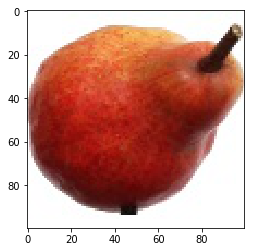

In [12]:
plt.imshow(new_x_train[0])

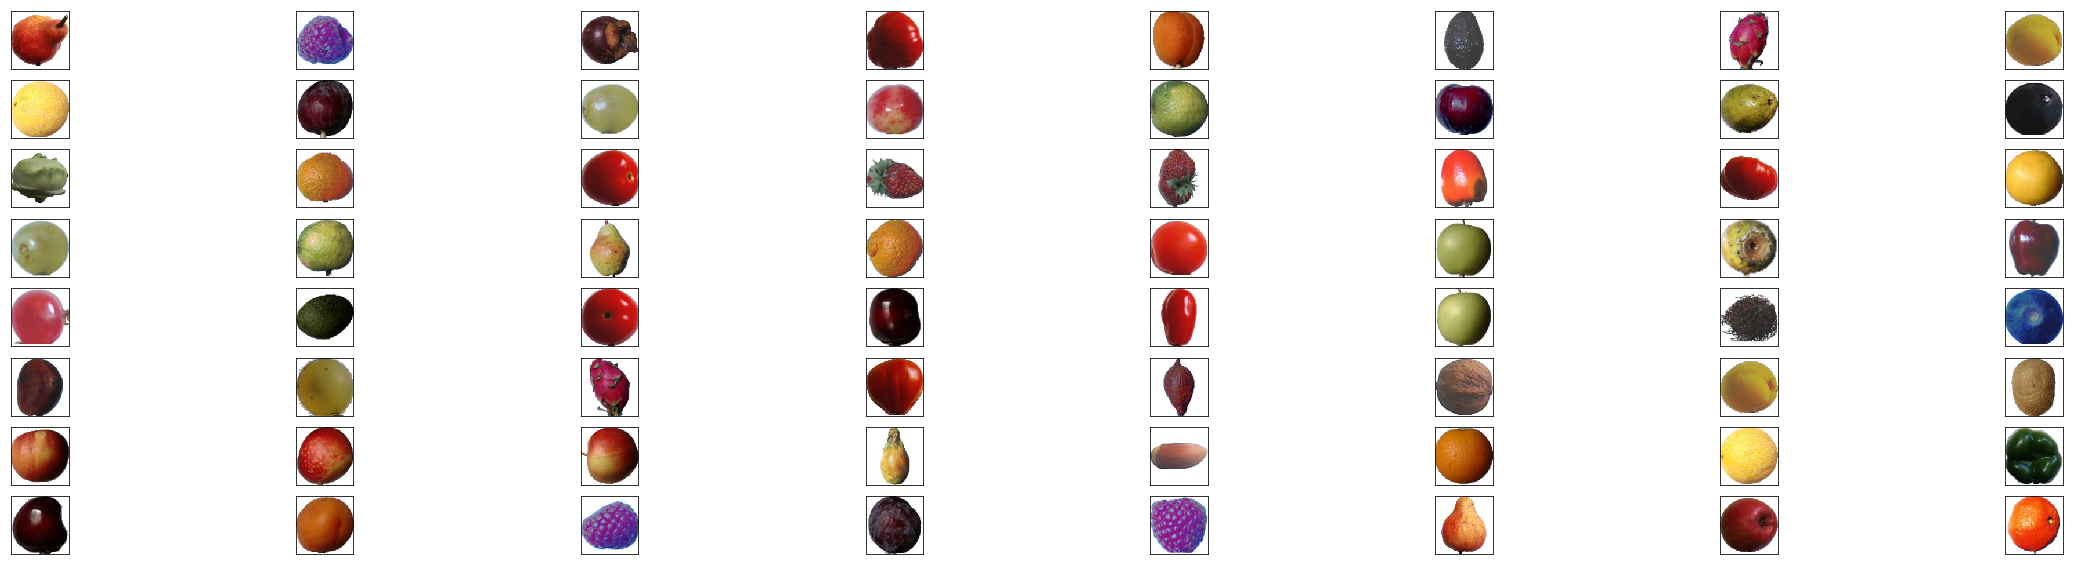

In [13]:
# 可視化前 64 個訓練圖像！
fig = plt.figure(figsize =(40,10))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[]) # (nrows, ncols, index, **kwargs) kwargs: xticks->list yticks->list on
    ax.imshow(np.squeeze(new_x_train[i]))  

<font color=blue  size=5 face="微軟正黑體" > 3. 建立模型 </font> 
* 建立CNN 模型，輸入水果圖像，透過卷積層、池化層、提取圖像特徵，再以完全連結神經網路，包括平坦層、隱藏層、輸出層，組成神經網路
* 研讀並選擇合適的Loss functions

<font color="#000080"  size=3 face="微軟正黑體" > 3.1 訓練模型(一) </font> 

In [14]:
# 建立CNN神經網路 - 使用4個Conv層，然後是maxpooling層
# 最後添加dropout，flatten和 fully connected layers(Dense)

# 建立空的神經網路學習機
model = Sequential()                        

# 產生 16 個類似濾鏡效果的卷積圖片,輸入層為 (100, 100, 3) 的三維陣列,卷積圖片大小與原始圖片一樣,也就是 100x100
# 定義conv2d 函數，進行卷積運算
# 使用 relu 激活函數
model.add(Conv2D(16, (3, 3), input_shape = (100, 100, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))   # 模型加入【第一層池化層】， 以 2x2 進行縮減取樣
model.add(Dropout(0.25))                      # 加入Dropout避免overfitting，保留75%神經元
                                              # 卷積圖片若為 100x100, 則縮減取樣後的圖片為 50x50
model.add(Conv2D(32, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())                                       # 模型加入【平坦層】
model.add(Dense(256, activation = "relu"))                 # 使用 relu 激活函數， 加入Dropout避免overfitting，保留50%神經元
model.add(Dropout(0.5))                                    # 隱藏層有 256 個神經元 (值越大, 訓練越精準, 相對訓練時間也越久)
model.add(Dense(num_categories, activation = "softmax"))   # 模型加入【輸出層】 有 103 個神經元
model.summary()                                            # 使用 softmax 激活函數 (softmax 值越高, 代表機率越大)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 32)        9248      
__________

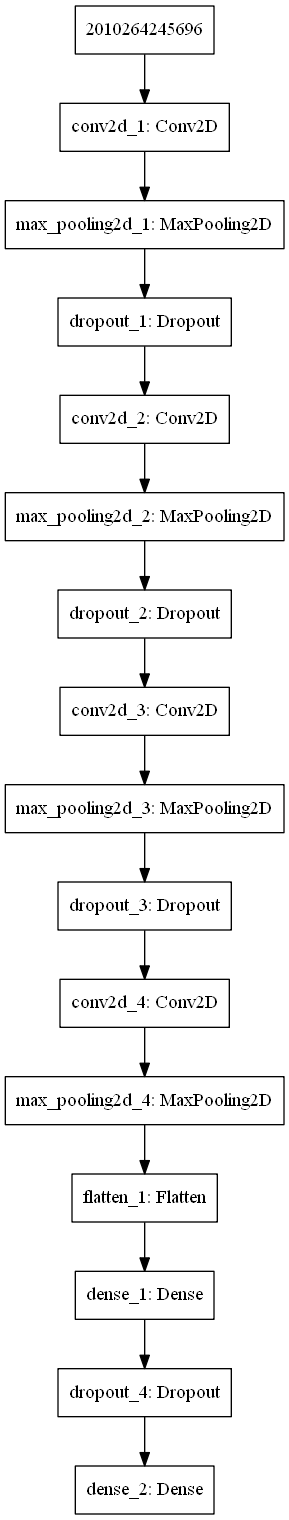

In [15]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import pydot
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='[NCTS]_Final_Report_CNN_Fruits360_DavidChi_&_JoserHu.png')
from IPython.display import Image
Image(filename="[NCTS]_Final_Report_CNN_Fruits360_DavidChi_&_JoserHu.png")

<font color="#FF0000"  size=3 face="微軟正黑體" > 3.2 訓練模型(二) <br> 
因電腦無GPU，無法採用ResNet50訓練模型，相當可惜無法看到成效 <br></font> 
<br>
<br>
<font color="#FF0000"  size=3 face="微軟正黑體" > 3.3 訓練模型(三) <br> 
此訓練模型，相當精準可達98%，但訓練週期須達30次，訊練相當耗時，因此無法微調相關參數，時間有限因此只好放棄此模型。 <br></font> 

---------------------------------------------<br>
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same')) model.add(Activation('relu'))<br>
model.add(MaxPooling2D(pool_size=(2,2)))<br>
model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same')) model.add(MaxPooling2D(pool_size=(2,2)))<br>
model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same')) model.add(MaxPooling2D(pool_size=(2,2)))<br>
model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same')) model.add(MaxPooling2D(pool_size=(2,2)))<br>
model.add(Dropout(0.3))<br>
model.add(Flatten())<br>
model.add(Dense(150))<br>
model.add(Activation('relu'))<br>
model.add(Dropout(0.4))<br>
model.add(Dense(num_categories,activation = 'softmax'))<br>

---------------------------------------------<br>
<br>
<br>

<font color="#000080"  size=3 face="微軟正黑體" > 設定模型的訓練方式 : </font> 
<br>
* 設定 Loss 損失函數為 categorical_crossentropy
* 設定 Optimizer 最佳化方法為 adam or rmsprop    
* 設定 Model 評估準確率方法為 accuracy

In [16]:
# 設定模型的訓練方式 (一)
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

<font color=blue  size=5 face="微軟正黑體" > 4. 訓練模型 </font> 

<p><font color="#000080"  size=3 face="微軟正黑體" > 提升準確率方式有 : </font> 
<br></p>
<ul>
<li>可再執行這個函數,進行重覆訓練</li>
<li>增加 卷積層 filter 數</li>
<li>增加 隱藏層 units 神經元數</li>
<li>增加 隱藏層 layer</li>
<li>更換訓練神經網路<br></li>
</ul>
<p><font color="#000080"  size=3 face="微軟正黑體" > 訓練說明 : </font> 
<br></p>
<ul>
<li>模型的保存及重用</li>
<li>每次訓練結束後回調比對，並保存最好的模型於hdf5。</li>
<li>輸入訓練資料，Feature 水果圖像特徵值與Label水果真實名稱</li>
<li>執行30次訓練週期，每一批次1024筆資料</li>
</ul>

In [17]:
# 定義訓練參數，訓練的歷史記錄, 會回傳到指定變數 history
# batch_size : 1024
# epochs : 30
history = model.fit(new_x_train,new_y_train, batch_size = 1024, epochs = 30, validation_data = (new_x_valid, new_y_valid), verbose = 2, shuffle = True) 

Train on 53177 samples, validate on 7000 samples
Epoch 1/30
 - 434s - loss: 4.0918 - acc: 0.0795 - val_loss: 3.1604 - val_acc: 0.2704
Epoch 2/30
 - 416s - loss: 2.2205 - acc: 0.3810 - val_loss: 1.2924 - val_acc: 0.7254
Epoch 3/30
 - 425s - loss: 1.0888 - acc: 0.6643 - val_loss: 0.6800 - val_acc: 0.8414
Epoch 4/30
 - 413s - loss: 0.6610 - acc: 0.7894 - val_loss: 0.4313 - val_acc: 0.8841
Epoch 5/30
 - 417s - loss: 0.4682 - acc: 0.8445 - val_loss: 0.3130 - val_acc: 0.9103
Epoch 6/30
 - 454s - loss: 0.3626 - acc: 0.8777 - val_loss: 0.2769 - val_acc: 0.9266
Epoch 7/30
 - 415s - loss: 0.3084 - acc: 0.8939 - val_loss: 0.2193 - val_acc: 0.9360
Epoch 8/30
 - 415s - loss: 0.2558 - acc: 0.9102 - val_loss: 0.2121 - val_acc: 0.9386
Epoch 9/30
 - 415s - loss: 0.2341 - acc: 0.9179 - val_loss: 0.1578 - val_acc: 0.9580
Epoch 10/30
 - 412s - loss: 0.2125 - acc: 0.9248 - val_loss: 0.1469 - val_acc: 0.9557
Epoch 11/30
 - 428s - loss: 0.1832 - acc: 0.9346 - val_loss: 0.1115 - val_acc: 0.9676
Epoch 12/30
 -

In [18]:
# 將模型儲存至 HDF5 檔案中
model.save("./fruits-360/[NCTS]_Final_Report_CNN_Fruits360_DavidChi_&_JoserHu.hdf5")  # creates a HDF5 file 

In [19]:
# 從 HDF5 檔案中載入模型，必須再執行一次 compile
#model = model.load_weights("./fruits-360/[NCTS]_Final_Report_CNN_Fruits360_DavidChi_&_JoserHu.hdf5")
print("CNN model loaded !")

CNN model loaded !


<font color=blue  size=5 face="微軟正黑體" > 5. 評估模型準確率 </font> 

In [20]:
# 估計準確度 損失和準確率
score = model.evaluate(new_x_test, new_y_test, verbose=0)
# 輸出結果
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04745463487954528
Test accuracy: 0.9857999077916091


<font color=blue  size=5 face="微軟正黑體" > 6. 進行預測 </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 使用訓練完成模型，輸入資料進行預測 </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 可視化測試預測結果, 隨機抽取測試圖像樣本，並預測標籤和標註數據(ground truth) </font> 

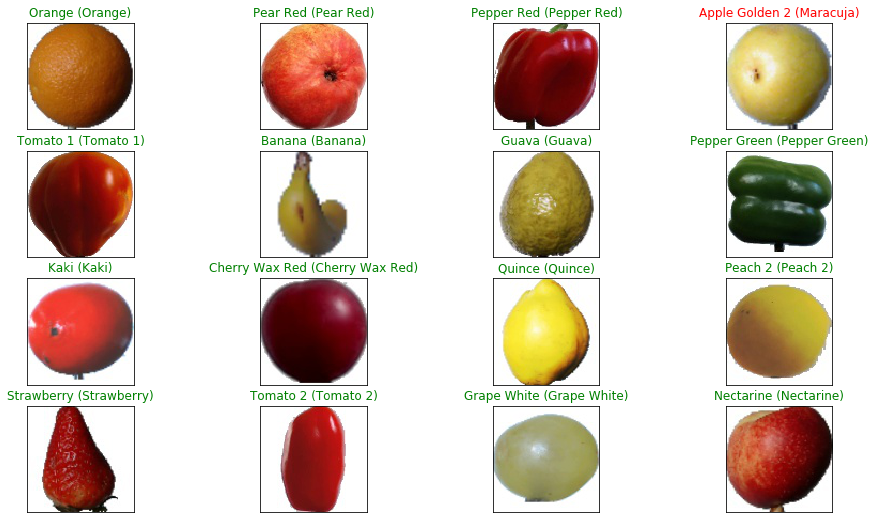

In [21]:
# 可視化測試預測結果
new_y_pred = model.predict(new_x_test)
# 隨機抽取測試圖像樣本，並預測標籤和標註數據(ground truth)
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(new_x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(new_x_test[idx]))
    pred_idx = np.argmax(new_y_pred[idx])
    true_idx = np.argmax(new_y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

<font color="#000080"  size=4 face="微軟正黑體">16種蔬果測試預測結果，僅有一種錯誤，預測結果如預期</font>

<font color=blue  size=5 face="微軟正黑體" > 7. 結果報告 </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 7.1 檢視損失和準確性結果 </font> 

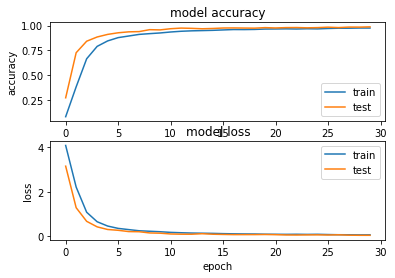

In [22]:
# 檢視損失率和精準度
plt.figure(1)  
   
# 準確度結果  
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='best')  
   
# 損失率結果      
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='best')  
plt.show()

<br>
<font color="#000080"  size=3 face="微軟正黑體" > 7.2 模糊矩陣 (Confusion Matrix) </font> 

In [23]:
y_pred = model.predict(new_x_test, batch_size=None, verbose=0, steps=None).argmax(axis=-1)
res_crosstab = pd.crosstab(y_pred, y_test[7000:])

dict_idx_fruit = {idx: label for idx, label in enumerate(test_labels)}
print(dict_idx_fruit)

res_crosstab

{0: 'Apple Braeburn', 1: 'Apple Crimson Snow', 2: 'Apple Golden 1', 3: 'Apple Golden 2', 4: 'Apple Golden 3', 5: 'Apple Granny Smith', 6: 'Apple Pink Lady', 7: 'Apple Red 1', 8: 'Apple Red 2', 9: 'Apple Red 3', 10: 'Apple Red Delicious', 11: 'Apple Red Yellow 1', 12: 'Apple Red Yellow 2', 13: 'Apricot', 14: 'Avocado', 15: 'Avocado ripe', 16: 'Banana', 17: 'Banana Lady Finger', 18: 'Banana Red', 19: 'Cactus fruit', 20: 'Cantaloupe 1', 21: 'Cantaloupe 2', 22: 'Carambula', 23: 'Cherry 1', 24: 'Cherry 2', 25: 'Cherry Rainier', 26: 'Cherry Wax Black', 27: 'Cherry Wax Red', 28: 'Cherry Wax Yellow', 29: 'Chestnut', 30: 'Clementine', 31: 'Cocos', 32: 'Dates', 33: 'Granadilla', 34: 'Grape Blue', 35: 'Grape Pink', 36: 'Grape White', 37: 'Grape White 2', 38: 'Grape White 3', 39: 'Grape White 4', 40: 'Grapefruit Pink', 41: 'Grapefruit White', 42: 'Guava', 43: 'Hazelnut', 44: 'Huckleberry', 45: 'Kaki', 46: 'Kiwi', 47: 'Kohlrabi', 48: 'Kumquats', 49: 'Lemon', 50: 'Lemon Meyer', 51: 'Limes', 52: 'Lyc

col_0,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
row_0,,,,,,,,,,,,,,,,,,,,,
0,77,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,84,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,99,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,96,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,108,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,110,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,99,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,77,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,103,0,...,0,0,0,0,0,0,0,0,0,0


<br>
<font color="#000080"  size=3 face="微軟正黑體" > 7.3 檢查各種最差精度 (Low Accuracy) </font> 

In [24]:
for idx in range(num_categories):
    accuracy = res_crosstab.loc[idx, idx] / res_crosstab.loc[:, idx].sum()
    flag = '***LOW***' if accuracy < 0.75 else ''
    print(dict_idx_fruit[idx])
    print('   ', flag, 'accuracy –', round(accuracy * 100, 2), '%')

Apple Braeburn
     accuracy – 76.24 %
Apple Crimson Snow
     accuracy – 100.0 %
Apple Golden 1
     accuracy – 100.0 %
Apple Golden 2
     accuracy – 100.0 %
Apple Golden 3
     accuracy – 100.0 %
Apple Granny Smith
     accuracy – 100.0 %
Apple Pink Lady
     accuracy – 100.0 %
Apple Red 1
     accuracy – 80.21 %
Apple Red 2
     accuracy – 100.0 %
Apple Red 3
     accuracy – 100.0 %
Apple Red Delicious
     accuracy – 100.0 %
Apple Red Yellow 1
     accuracy – 100.0 %
Apple Red Yellow 2
     accuracy – 100.0 %
Apricot
     accuracy – 100.0 %
Avocado
     accuracy – 100.0 %
Avocado ripe
     accuracy – 100.0 %
Banana
     accuracy – 78.9 %
Banana Lady Finger
     accuracy – 100.0 %
Banana Red
     accuracy – 100.0 %
Cactus fruit
     accuracy – 100.0 %
Cantaloupe 1
     accuracy – 100.0 %
Cantaloupe 2
     accuracy – 99.03 %
Carambula
     accuracy – 90.38 %
Cherry 1
     accuracy – 100.0 %
Cherry 2
     accuracy – 100.0 %
Cherry Rainier
     accuracy – 95.65 %
Cherry Wax Black
    

<br>
<font color="#000080"  size=3 face="微軟正黑體" > 7.4 模型中問題點 </font> 

In [25]:
for idx in range(35):
    for idx2 in range(35):
        accuracy = res_crosstab.loc[idx, idx] / res_crosstab.loc[:, idx].sum()
        if idx != idx2 and res_crosstab.loc[idx, idx2] != 0:
            pred_fruit = dict_idx_fruit[idx]
            actual_fruit = dict_idx_fruit[idx2]
            num_mistakes = res_crosstab.loc[idx, idx2]
            sing_or_plural = 's' if num_mistakes > 1 else ''
            print('- {} {}{} mistaken for {}{}'.format(num_mistakes, actual_fruit, sing_or_plural, pred_fruit, sing_or_plural))

- 2 Apple Red 1s mistaken for Apple Braeburns
- 8 Apple Red 1s mistaken for Apple Red 3s
- 2 Bananas mistaken for Banana Lady Fingers
- 21 Bananas mistaken for Cactus fruits
- 2 Cherry Rainiers mistaken for Cantaloupe 2s
- 7 Cocoss mistaken for Datess


<p><br>
<font color=blue  size=6 face="微軟正黑體">未來延伸應用說明</font> 
<br>
<br>
<font color="#000080"  size=4 face="微軟正黑體">
　　在現代溫室中，勞動力成本相當高，甚至缺工嚴重，因此對自動化採收蔬果需求很高。<br>
然而在溫室惡劣的氣候條件下能夠接受重複任務與熟練的勞力也正在急速下降中。在過去幾<br>
十年中，水果和蔬菜自動採收的現有技術，也只能針對高價值蔬果來研發與製造自動採收設<br>
備，中小型蔬果農基於自動採收設備成本過高，無力購置因此無法普及也無法解決勞動力下<br>
問題，時常面臨產能過剩，因找不到工人或工資過高，乾脆任由它腐爛，相當浪費資源，也<br>
因此開始關注本土農業，對農業機器人進行了基礎研究。<br>
    <br>
　　有賴於近期機器手臂，機器視覺，傳感，控制，物聯網及人工智慧等技術躍進式崛起，<br>
因此興起利用人工智慧辨識各種蔬果成熟度並搭配機器人整合成自動採收系統，提供給農名<br>
機器人收穫解決方案。<br>
</font>
    <br><br>
</p>
<br>
<p><font color="blue"  size=5 face="微軟正黑體"> [早期] <br> </font> 
<font color="#000080"  size=3 face="微軟正黑體">影像演算法辨識精準度低，程式修改費時耗工</font><br>
<img src="TID1.png" alt="drawing" style="width: 800px;"/></p>
<br>
<br>
<p><font color="blue"  size=5 face="微軟正黑體"> [近期] <br> </font> 
<font color="#000080"  size=3 face="微軟正黑體"> 
    <br>
    機器手臂，電腦機器視覺辨識精準率雖然提高，但應用在其它蔬果辨識仍然需要仰賴專<br>
    業人員重新定義視覺辨識程序，並非完全自動化。<br>
    <br>
</font><br>
<img src="CID1.png" alt="drawing" style="width: 800px;"/></p>
<br>
<br>
<p><font color="blue"  size=5 face="微軟正黑體"> [未來人工智慧自動辨識採收機] <br> </font> 
<font color="#000080"  size=3 face="微軟正黑體"> 
    <br>
    人工智慧自動採收機將搭配機器手臂，人工智慧機器視覺，辨識率相當精準，可自動辨<br>
    識蔬果種類，檢視熟程度及採收方法，完全自動化來降低勞力成本，與合理機器價格。<br>
    <br>
    </font><br>
<img src="FID1.png" alt="drawing" style="width: 800px;"/></p>
<br>
<br>
<p><font color="blue"  size=6 face="微軟正黑體"> [未來期望精準農業] <br><br> </font> 
<font color="#000080"  size=5 face="微軟正黑體"> 透過精準管理，蔬果採收也能很智慧！</font> <br> 
<font color="#000080"  size=3 face="微軟正黑體"> 
    <br>
    每年正逢蔬果豐收時節，果農們便開始準備採收，一顆顆散發濃郁果香的果實象徵著農<br>
    民的辛勤和努力，秋冬季節在田中逐漸飽滿成熟的稻穗，則是栽種者在歷經將近一整年<br>
    與大自然的搏鬥後所獲得的最好禮物；只不過，農民們也很可能在這場與自然天候、濕<br>
    度、溫度、日照以及環境的戰爭中敗下陣來，而最終落得所投入的人力、財力和時間皆<br>
    化為烏有的不幸情景。事實上，農耕栽種向來皆被認定為不確定性高、必須看天吃飯的<br>
    行業，然而，隨著物聯網、雲端運算、人工智慧以及感測技術..等科技的應用與發展日<br>
    漸成熟，可透過物聯網及智慧監控系統所蒐集且上傳至雲端的各類資料，可藉由大數據<br>
    分析出不同階段農作物的生長關鍵，並進而將此反饋至下一輪的生產流程當中，以期更<br>
    加精準地掌握有助於農作物生產最佳化的環境因子和因應方式，同時更持續優化成長條<br>
    件且提升產能和品質，現今的農業在其人工智慧新型應用加持之下已經不可同日而語！<br>
    <br>
<br>
</font></p>